In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("letter_recognition.data", sep=",")
X = dataset.iloc[:, 1:17]
Y = dataset.iloc[:, 0]


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='logistic')
mlp.fit(X_train_scaled, Y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(250, 300),
              max_iter=1000000)

In [6]:
Y_pred = mlp.predict(X_test_scaled)

In [7]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.973


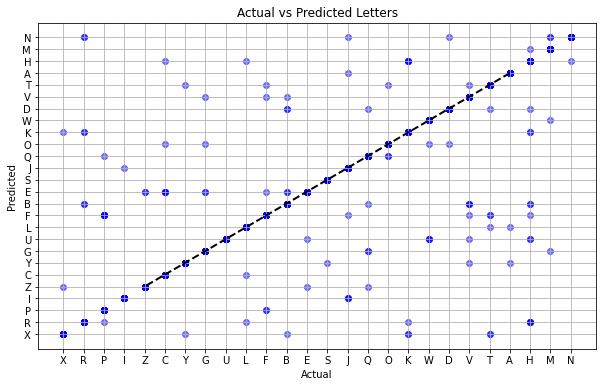

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Letters')
plt.grid(True)
plt.show()

In [16]:
def predict_letter(features):
    # Preprocess features
    features_scaled = scaler.transform([features])  # Assuming features is a list or array
    
    # Make prediction
    predicted_letter = mlp.predict(features_scaled)
    
    return predicted_letter[0]

def get_user_input():
    input_features = []
    print("Enter values for each feature (separated by spaces or commas):")
    features_input = input().strip().replace(",", " ").split()
    try:
        input_features = [float(feature) for feature in features_input]
    except ValueError:
        print("Invalid input. Please enter numeric values only.")
    return input_features

# Get user input
input_features = get_user_input()

# Predict output letter if input is valid
if input_features:
    predicted_output = predict_letter(input_features)
    print("Predicted output letter:", predicted_output)




Enter values for each feature (separated by spaces or commas):
2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
Predicted output letter: D


C:\Users\Deokar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
